In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [48]:
data = pd.read_csv("C:\\Users\\George\\Documents\\WhatsAppChatData.txt", sep = ',', error_bad_lines=False,header = None)

b'Skipping line 30: expected 2 fields, saw 4\nSkipping line 51: expected 2 fields, saw 4\nSkipping line 82: expected 2 fields, saw 3\nSkipping line 113: expected 2 fields, saw 3\nSkipping line 116: expected 2 fields, saw 3\nSkipping line 120: expected 2 fields, saw 3\nSkipping line 141: expected 2 fields, saw 3\nSkipping line 145: expected 2 fields, saw 3\nSkipping line 158: expected 2 fields, saw 3\nSkipping line 161: expected 2 fields, saw 3\nSkipping line 174: expected 2 fields, saw 4\nSkipping line 204: expected 2 fields, saw 4\nSkipping line 210: expected 2 fields, saw 3\nSkipping line 213: expected 2 fields, saw 3\nSkipping line 220: expected 2 fields, saw 3\nSkipping line 227: expected 2 fields, saw 3\nSkipping line 232: expected 2 fields, saw 3\nSkipping line 233: expected 2 fields, saw 3\nSkipping line 260: expected 2 fields, saw 3\nSkipping line 278: expected 2 fields, saw 3\nSkipping line 281: expected 2 fields, saw 3\nSkipping line 313: expected 2 fields, saw 3\nSkipping li

In [49]:
data = pd.DataFrame(data)
data2['A'], data2['B'] = data[1].str.split('-',1).str
#df['AB'].str.split(' ', 1, expand=True)
#df['A'], df['B'] = df['AB'].str.split('-', 1).str

In [113]:
data2 = pd.DataFrame(data2)
data = pd.DataFrame(data[0])
data3 = pd.merge(data,data2, left_index = True, right_index = True)

In [114]:
i = 2
j = 3
data4 = data3
while i < 15:
    data3.drop(data3.columns[j], axis=1,inplace = True)
    i += 1

In [115]:
data4['Person'], data4['Text'] = data3[1].str.split(':',1).str

In [203]:
#data4.drop(data4.columns[2],axis = 1,inplace = True)
#now finally just split the text into words?
data4['0_x'].value_counts()

27/12/2017                                                       393
19/04/2018                                                       381
30/10/2017                                                       348
07/03/2018                                                       341
28/02/2018                                                       329
06/03/2018                                                       318
14/10/2017                                                       314
20/04/2018                                                       309
03/12/2017                                                       289
12/12/2017                                                       279
01/11/2017                                                       275
25/10/2017                                                       269
04/11/2017                                                       266
24/12/2017                                                       264
23/10/2017                        

In [121]:
data4.groupby('Person')['Text'].value_counts()

Person         Text                         
 Beth Evans     <Media omitted>                 335
                :(                              124
                Miss you                         91
                Hahaha                           73
                Poor thing                       72
                How are you doing?               62
                😍                                54
                😘                                47
                ?                                46
                Nice :)                          36
                How are you?                     35
                Haha                             34
                Love you jelly                   31
                ❤️❤️❤️                           31
                Blegh                            30
                Lol                              30
                Love love love                   30
                Love you                         29
                ❤️ 

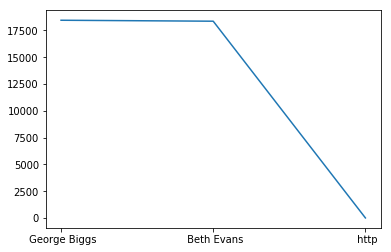

In [184]:
data4['Person'].value_counts()
#I send more messages!!!
plt.plot(data4['Person'].value_counts()) 

In [200]:
data4.head()
data4 = pd.DataFrame(data4)
data4['date'] = pd.to_datetime(data4['0_x'])

ValueError: ('Unknown string format:', 'I like dogs')

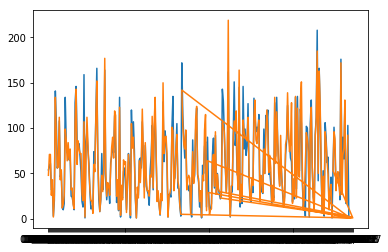

In [192]:
#data4.groupby('Person')['0_x'].value_counts()
plt.plot(data4[data4['Person'].str.strip() == 'Beth Evans']['0_x'].value_counts().sort_index())
plt.plot(data4[data4['Person'].str.strip() == 'George Biggs']['0_x'].value_counts().sort_index())

plt.show()

In [195]:
data4[data4['Person'].str.strip() == 'Beth Evans']['0_x'].value_counts().sort(0)

AttributeError: 'Series' object has no attribute 'sort'

TypeError: (' Beth Evans', '27/12/2017') is not a string

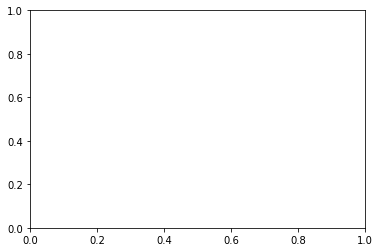

In [183]:
textbyday = data4.groupby('Person')['0_x'].value_counts()
plt.plot(textbyday)

In [138]:
data4.head()

,0_x,0_y,Person,Text
0,09/10/2017,20:33,Beth Evans,You sure?
1,09/10/2017,20:33,George Biggs,Yeah why not
2,09/10/2017,20:33,Beth Evans,Coool :)
3,09/10/2017,20:36,Beth Evans,Booked! Yay for Christmas tour :)
4,09/10/2017,20:37,George Biggs,Woot woot


In [160]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [1]:
bethdata = data4[data4['Person'].str.strip() == 'Beth Evans']
georgedata = data4[data4['Person'].str.strip() == 'George Biggs']


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'Media omitted' not in word
                                and 'Moona' not in word
                                and 'Media' not in word
                                and 'omitted' not in word
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud_draw(bethdata['Text'],'white')
wordcloud_draw(georgedata['Text'],'black')


NameError: name 'data4' is not defined

In [212]:
tweets = []
stopwords_set = set(stopwords.words("english"))
train['text'] = pd.DataFrame(bethtext)
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg

AttributeError: 'Series' object has no attribute 'sentiment'

In [207]:
bethtext = bethdata['Text']
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(bethtext))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

ValueError: too many values to unpack (expected 2)

In [205]:
training_set = nltk.classify.apply_features(extract_features,bethdata['Text'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [217]:
import textblob

In [281]:
bethdata.tail()

,0_x,0_y,Person,Text
38837,24/08/2018,18:52,Beth Evans,Assuming you'll be underground
38838,24/08/2018,18:52,Beth Evans,Gunna run to Tesco then home
38840,26/08/2018,00:46,Beth Evans,Just letting you know I'm safe jelly
38841,26/08/2018,00:46,Beth Evans,Miss you
38842,26/08/2018,00:46,Beth Evans,Talked about you lots


In [230]:
#try the alternative method now
analysis = bethtext
def get_tweet_sentiment(tweet):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = textblob(bethtext)
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

 

In [342]:
df['polarity'] = df.apply(lambda x: TextBlob(x['Text']).sentiment.polarity, axis = 1)
df['subjectivity'] = df.apply(lambda x: TextBlob(x['Text']).sentiment.subjectivity, axis = 1)


In [238]:
from textblob import TextBlob

In [341]:
df = pd.DataFrame(bethtext)

In [246]:
bethtext.columns = ['text']

AttributeError: 'list' object has no attribute 'columns'

In [283]:
bethtext = bethdata['Text']

In [271]:
for text in df:
    print(text)

Text


In [344]:
df['polarity'].mean()

0.06897017011950393

In [287]:
df.describe()

,Text
count,18367
unique,14786
top,<Media omitted>
freq,335


In [277]:
bethdata = data4[data4['Person'].str.strip() == 'Beth Evans']

In [349]:
sentimentdata = pd.merge(df,bethdata,left_index = True, right_index = True)

In [350]:
sentimentdata

,Text_x,polarity,subjectivity,0_x,0_y,Person,Text_y
0,You sure?,0.500000,0.888889,09/10/2017,20:33,Beth Evans,You sure?
2,Coool :),0.500000,1.000000,09/10/2017,20:33,Beth Evans,Coool :)
3,Booked! Yay for Christmas tour :),0.500000,1.000000,09/10/2017,20:36,Beth Evans,Booked! Yay for Christmas tour :)
5,:),0.500000,1.000000,09/10/2017,20:39,Beth Evans,:)
6,Love you,0.500000,0.600000,09/10/2017,20:39,Beth Evans,Love you
8,😍,0.000000,0.000000,09/10/2017,20:45,Beth Evans,😍
9,Also you owe me £30 at some point,0.000000,0.000000,09/10/2017,20:46,Beth Evans,Also you owe me £30 at some point
12,Ruuude,0.000000,0.000000,09/10/2017,20:48,Beth Evans,Ruuude
13,Also do you still owe me for sush?,0.000000,0.000000,09/10/2017,20:49,Beth Evans,Also do you still owe me for sush?
14,Also I love you,0.500000,0.600000,09/10/2017,20:49,Beth Evans,Also I love you


In [351]:
dailysentiment = sentimentdata.groupby('0_x')['polarity'].mean().sort_index()

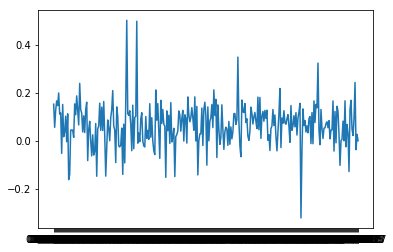

In [352]:
plt.plot(dailysentiment)
plt.show()

In [353]:
#sentimentdata.groupby(pd.Grouper(freq='M')) 
sentimentdata['test'] = sentimentdata.set_index(pd.to_datetime(sentimentdata['0_x']),inplace = True)

In [354]:
#pd.merge(sentimentdata2,sentimentdata,left_index=True,right_index=True)
sentimentdata.index

DatetimeIndex(['2017-09-10', '2017-09-10', '2017-09-10', '2017-09-10',
               '2017-09-10', '2017-09-10', '2017-09-10', '2017-09-10',
               '2017-09-10', '2017-09-10',
               ...
               '2018-08-24', '2018-08-24', '2018-08-24', '2018-08-24',
               '2018-08-24', '2018-08-24', '2018-08-24', '2018-08-26',
               '2018-08-26', '2018-08-26'],
              dtype='datetime64[ns]', name='0_x', length=18367, freq=None)

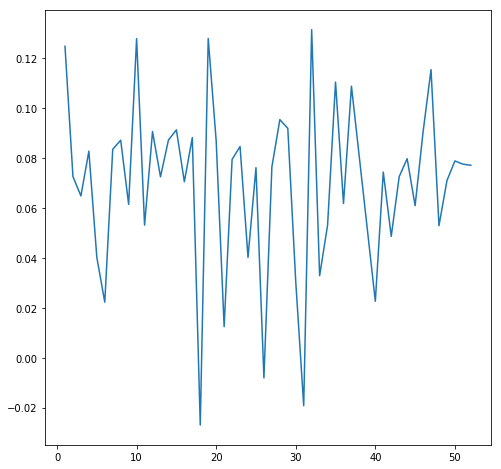

In [355]:
plt.figure(figsize= (8,8))
#df.groupby(by=[b.index.month, b.index.year]).
plt.plot(sentimentdata.groupby(by = [sentimentdata.index.week])['polarity'].mean())

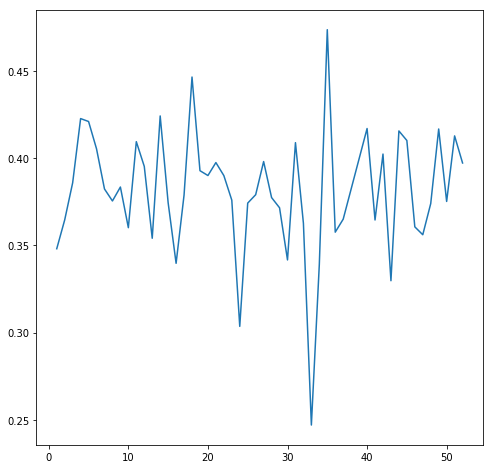

In [330]:
plt.figure(figsize= (8,8))
#df.groupby(by=[b.index.month, b.index.year]).
plt.plot(sentimentdata.groupby(by = [sentimentdata.index.week])['subjectivity'].mean())

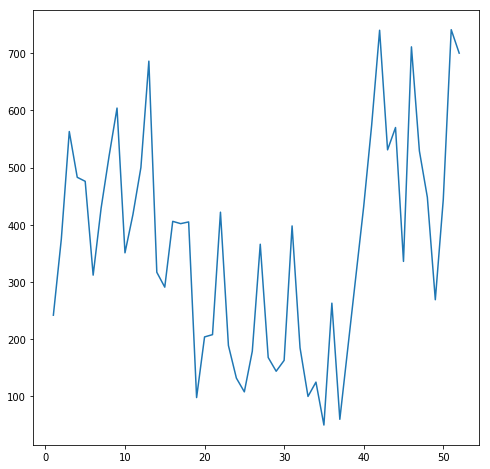

In [356]:
plt.figure(figsize= (8,8))
#df.groupby(by=[b.index.month, b.index.year]).
plt.plot(sentimentdata.groupby(by = [sentimentdata.index.week])['subjectivity'].count())

In [336]:
#george sentiment data time
georgedata
df2 = pd.DataFrame(georgedata['Text'])
df2['polarity'] = df2.apply(lambda x: TextBlob(x['Text']).sentiment.polarity, axis = 1)
df2['subjectivity'] = df2.apply(lambda x: TextBlob(x['Text']).sentiment.subjectivity, axis = 1)


In [379]:
df2.sort_values(by = 'polarity')


,Text,polarity,subjectivity
1,Yeah why not,0.000000,0.000000
4,Woot woot,0.000000,0.000000
7,Love you more,0.500000,0.550000
10,Lol k,0.800000,0.700000
11,I'll dump you first,0.250000,0.333333
15,No,0.000000,0.000000
16,Bad,-0.700000,0.666667
17,Wait,0.000000,0.000000
19,Maybe actually,0.000000,0.100000
21,Ok maybe,0.500000,0.500000


In [347]:
sentimentdata_g = pd.merge(df2,georgedata,left_index = True, right_index = True)
dailysentiment_g = sentimentdata_g.groupby('0_x')['polarity'].mean().sort_index()

In [340]:
dailysentiment.mean()

0.02638520286864643

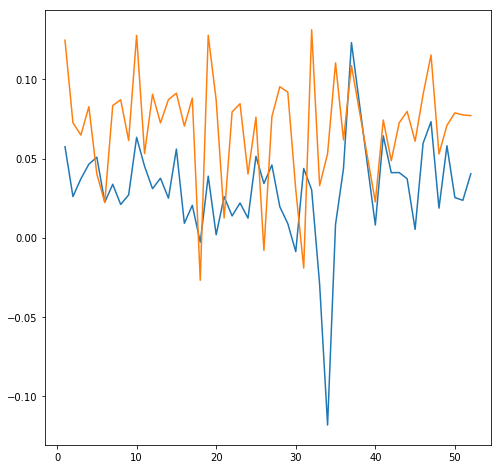

In [372]:
plt.figure(figsize= (8,8))
#df.groupby(by=[b.index.month, b.index.year]).
#sentimentdata.groupby(pd.Grouper(freq='M')) 
sentimentdata_g['test'] = sentimentdata_g.set_index(pd.to_datetime(sentimentdata_g['0_x']),inplace = True)
plt.plot(sentimentdata_g.groupby(by = [sentimentdata_g.index.week])['polarity'].mean())
plt.plot(sentimentdata.groupby(by = [sentimentdata.index.week])['polarity'].mean())

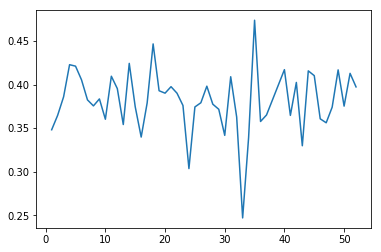

In [358]:
plt.plot(sentimentdata.groupby(by = [sentimentdata.index.week])['subjectivity'].mean())

In [377]:
sentimentdata_g.groupby('0_x')['polarity'].mean().sort_values()

C:\Users\George\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '0_x' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


0_x
17/04/2018   -0.800000
23/08/2018   -0.274464
06/07/2018   -0.214286
09/02/2018   -0.160714
21/08/2018   -0.149527
22/04/2018   -0.144737
13/07/2018   -0.130172
18/07/2018   -0.126551
05/06/2018   -0.126319
27/07/2018   -0.124242
24/07/2018   -0.121154
16/06/2018   -0.109211
04/06/2018   -0.101235
19/08/2018   -0.095188
05/05/2018   -0.090909
04/07/2018   -0.090500
14/06/2018   -0.086944
05/03/2018   -0.083500
22/06/2018   -0.083309
15/05/2018   -0.082378
11/06/2018   -0.081375
11/07/2018   -0.081317
21/04/2018   -0.076659
06/01/2018   -0.070246
08/08/2018   -0.070000
24/08/2018   -0.068214
20/08/2018   -0.065364
03/06/2018   -0.057721
01/08/2018   -0.057372
03/02/2018   -0.057100
                ...   
12/03/2018    0.108047
24/04/2018    0.110374
20/10/2017    0.111514
11/11/2017    0.111594
01/02/2018    0.113390
01/05/2018    0.116346
14/10/2017    0.116442
17/02/2018    0.122222
31/05/2018    0.133333
09/11/2017    0.133764
25/11/2017    0.133967
10/10/2017    0.139490
16/07/2

In [369]:
test = sentimentdata.groupby(by = [sentimentdata.index.week])['polarity']

In [374]:
sentimentdata.groupby(by = [sentimentdata.index.week])['polarity'].describe()

,count,mean,std,min,25%,50%,75%,max
0_x,,,,,,,,
1,242.0,0.124778,0.323131,-1.000000,0.000000,0.0,0.350000,1.0000
2,375.0,0.072575,0.349914,-1.000000,0.000000,0.0,0.250000,1.0000
3,563.0,0.064825,0.342484,-0.800000,0.000000,0.0,0.234524,0.9000
4,483.0,0.082780,0.376597,-0.800000,0.000000,0.0,0.350000,1.0000
5,476.0,0.040216,0.381673,-1.000000,-0.025000,0.0,0.300000,1.0000
6,312.0,0.022264,0.370067,-1.000000,-0.079688,0.0,0.200000,1.0000
7,429.0,0.083508,0.362020,-1.000000,0.000000,0.0,0.300000,1.0000
8,520.0,0.087163,0.356801,-0.937500,0.000000,0.0,0.302083,1.0000
9,604.0,0.061425,0.341722,-0.875000,0.000000,0.0,0.250000,1.0000


In [388]:
sentimentdata_g[sentimentdata_g['0_x'] == '18/06/2018' ]

,Text_x,polarity,subjectivity,0_x,0_y,Person,Text_y,test
0_x,,,,,,,,
2018-06-18,Love you,0.5,0.6,18/06/2018,08:51,George Biggs,Love you,None
2018-06-18,Hope you have a nice day,0.6,1.0,18/06/2018,08:51,George Biggs,Hope you have a nice day,None


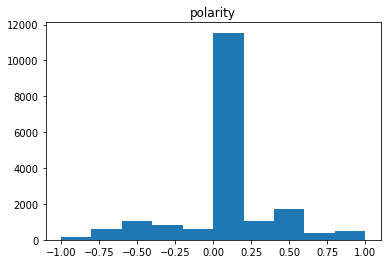

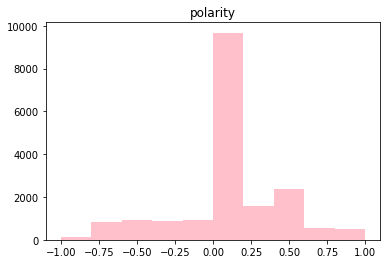

In [441]:
sentimentdata_g.hist(column="polarity",grid = False)
plt.savefig('C:\\Users\\George\\Documents\\georgepolarity.pdf') 
sentimentdata.hist(column = "polarity",color = 'pink',grid = False)
plt.savefig('C:\\Users\\George\\Documents\\bethpolarity.pdf') 

In [400]:
#do some grouping
def groupmestuff(sentimentdata):
    if sentimentdata['polarity'] > 0.5:
        return 'positive'
    elif sentimentdata['polarity'] < -0.5:
        return 'negative'
    else: return 'neutral'
    
testing = sentimentdata.groupby(groupmestuff(sentimentdata), axis=1)
testing = sentimentdata
testing['color'] = np.where(testing['polarity']< 0.5, 'negative', 'positive')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [453]:
testing = sentimentdata
testing['bucket'] = np.where(testing['polarity']> 0.5, 'positive', np.where(testing['polarity']< -0.5,'negative','neutral'))

In [454]:
counting_beth = testing['bucket'].value_counts()

In [455]:
counting_beth

neutral     15418
positive     1717
negative     1232
Name: bucket, dtype: int64

In [411]:
testing_g = sentimentdata_g
testing_g['bucket'] = np.where(testing_g['polarity']> 0.5, 'positive', np.where(testing_g['polarity']< -0.5,'negative','neutral'))

In [456]:
counting_george = testing_g['bucket'].value_counts()
counting_george

neutral     16309
positive     1194
negative      954
Name: bucket, dtype: int64

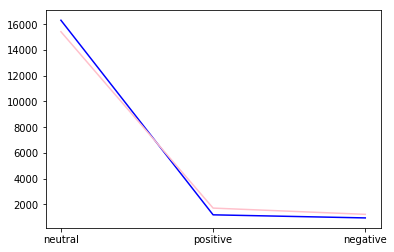

In [414]:
plt.plot(counting_george,color = 'blue')
plt.plot(counting_beth,color = 'pink')

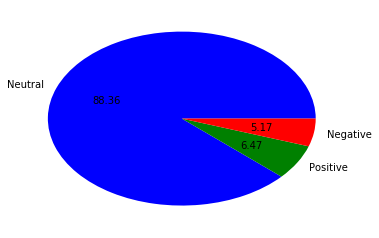

In [471]:

colors = ['#0000ff','#008000', '#ff0000']
#plt.title('George Texts')
plt.pie(counting_george,autopct='%.2f', labels = ['Neutral','Positive','Negative'],colors = colors)
plt.savefig('C:\\Users\\George\\Documents\\georgepie.pdf') 

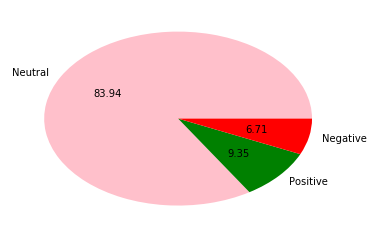

In [472]:
colors = ['#FFC0CB', '#008000', '#ff0000']
plt.pie(counting_beth,autopct='%.2f',labels = ['Neutral','Positive','Negative'],colors = colors)
plt.savefig('C:\\Users\\George\\Documents\\bethpie.pdf') 

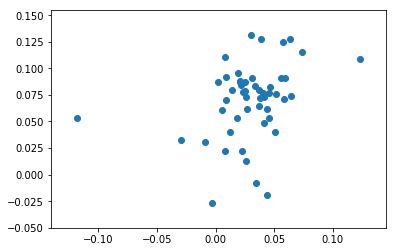

In [425]:
plt.scatter(sentimentdata_g.groupby(by = [sentimentdata_g.index.week])['polarity'].mean(),sentimentdata.groupby(by = [sentimentdata.index.week])['polarity'].mean() )
#plt.plot(sentimentdata.groupby(by = [sentimentdata.index.week])['polarity'].mean())

In [427]:
corr_anal = pd.corr(sentimentdata_g.groupby(by = [sentimentdata_g.index.week])['polarity'].mean(),sentimentdata.groupby(by = [sentimentdata.index.week])['polarity'].mean(),left_index = True,right_index = True)

AttributeError: module 'pandas' has no attribute 'corr'

In [434]:
georgemerge = sentimentdata_g.groupby(by = [sentimentdata_g.index.week])['polarity'].mean().reset_index()
bethmerge = sentimentdata.groupby(by = [sentimentdata.index.week])['polarity'].mean().reset_index()

In [437]:
georgemerge['polarity'].corr(bethmerge['polarity'])

0.32108121201107365

,0_x,polarity
0,1,0.057455
1,2,0.025957
2,3,0.037214
3,4,0.046425
4,5,0.050859
5,6,0.022404
6,7,0.033720
7,8,0.020971
8,9,0.027038
9,10,0.063390
